

# Project: Data Analysis on tmdb-movies data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project i will be working on a movie data set collect from The Movies Database. it conatins about 10,000 movies.
From this data we will be looking at the questions below.
>
>1.**Do movies with high popularity generate a higher revenue?**
 I would to find if movies with revenue have something in common, something which movies with low revenues don't have. 
>
>2.**Do movies high budget generates high profit?**
>
>3.**What are the top 5 movies based on profit?**
>
>4.**Which movies had the best movie_rating and who were the movie directors?**
>
>5.**What is the average budget for a particular genre and which costs more?**
>
>6.**Do movies with high runtime have high budget?** 
>
>7.**Which genres have the highest movie_ratings?**
>
>8.**Through the peroid which directors produced most movies and what are their average movie_ratings?**

>9.**Do movies with high vote_count have high revenues?**

In [1336]:
# import packages 
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import time


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [1337]:
# load data
df = pd.read_csv("tmdb-movies.csv")

In [1338]:
#print number of columns and rows
# display head of  data
print(df.shape)
df.head(3)

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,33.0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1392445892.5
1,76341,tt1392190,28.4,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,348161292.5
2,262500,tt2908446,13.1,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,271619025.4


In [1339]:
# display tail od data
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.1,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.0
10864,21449,tt0061177,0.1,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.0,0.0
10865,22293,tt0060666,0.0,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.3,0.0


In [1340]:
#get a genral information on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [1341]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.0,10866.0,10866.0,10866.0,10866.0,10866.0,10866.0,10866.0,10866.0,10866.0
mean,66064.2,0.6,14625701.1,39823319.8,102.1,217.4,6.0,2001.3,17551039.8,51364363.3
std,92130.1,1.0,30913213.8,117003486.6,31.4,575.6,0.9,12.8,34306155.7,144632485.0
min,5.0,0.0,0.0,0.0,0.0,10.0,1.5,1960.0,0.0,0.0
25%,10596.2,0.2,0.0,0.0,90.0,17.0,5.4,1995.0,0.0,0.0
50%,20669.0,0.4,0.0,0.0,99.0,38.0,6.0,2006.0,0.0,0.0
75%,75610.0,0.7,15000000.0,24000000.0,111.0,145.8,6.6,2011.0,20853251.1,33697095.7
max,417859.0,33.0,425000000.0,2781505847.0,900.0,9767.0,9.2,2015.0,425000000.0,2827123750.4


In [1342]:
# Check for null values in columns
df.isnull().sum().sort_values(ascending=False)

homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
budget_adj                 0
release_year               0
vote_average               0
vote_count                 0
release_date               0
id                         0
runtime                    0
original_title             0
revenue                    0
budget                     0
popularity                 0
revenue_adj                0
dtype: int64

In [1343]:
#check sum of duplicates 
df.duplicated().sum()

1

In [1344]:
#number of unique values in each column
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [1345]:
#The data contain how many number of years
print(df["release_year"].nunique())
df["release_year"].unique()

56


array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

### Drop errneous colunms 

In [1346]:
# drop collunms with high null values
df.drop(["homepage", "tagline", "keywords", "production_companies"], axis=1, inplace=True)
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,33.0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939.3,1392445892.5
1,76341,tt1392190,28.4,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939.3,348161292.5


In [1347]:
#drop uneccessary columns
df.drop(["imdb_id", "id"], axis=1, inplace=True)
df.head(2)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,33.0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939.3,1392445892.5
1,28.4,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939.3,348161292.5


In [1348]:
# Confirm dropped colunms
df.shape

(10866, 15)

### Suppress scietific notations in budget_adj and revenue_adj

In [1349]:
pd.options.display.float_format = '{:.1f}'.format
df.head()

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,33.0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939.3,1392445892.5
1,28.4,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939.3,348161292.5
2,13.1,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955.5,271619025.4
3,11.2,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,183999919.0,1902723129.8
4,9.3,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,174799923.1,1385748801.5


### Drop duplicates and confirm

In [1350]:
# drop duplicates
df = df.drop_duplicates()
df.head()

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,33.0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939.3,1392445892.5
1,28.4,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,137999939.3,348161292.5
2,13.1,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101199955.5,271619025.4
3,11.2,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,183999919.0,1902723129.8
4,9.3,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,174799923.1,1385748801.5


In [1351]:
# confirm number of duplicates
df.duplicated().sum()

0

### Check erroneous rows

In [1352]:
#check for null value in the rows
print(df.isnull().sum().sum())
df.isnull().sum().sort_values(axis= 0, ascending=False)

147


cast              76
director          44
genres            23
overview           4
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [1353]:
df.dropna(inplace=True)

In [1354]:
#Confirm dropped rows
df.isnull().sum().sort_values(axis=0)

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [1355]:
# It will be appropriate to rename movie_rating to movie_rating
df.rename(columns={'vote_average': 'movie_rating'}, inplace=True)

### Divide the budget, revenue, revenue_adj and budget_adj columns by 1000000

In [1356]:
df["budget"] = df["budget"]/1000000
df["revenue"] = df["revenue"]/1000000
df["budget_adj"] = df["budget_adj"]/1000000
df["revenue_adj"] = df["revenue_adj"]/1000000
df.head(2)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,movie_rating,release_year,budget_adj,revenue_adj
0,33.0,150.0,1513.5,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,138.0,1392.4
1,28.4,150.0,378.4,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,138.0,348.2


### Check the statistical summary on revenue, budget

In [1357]:
# Check the statistical summary on revenue
df["revenue"].describe()

count   10729.0
mean       40.3
std       117.7
min         0.0
25%         0.0
50%         0.0
75%        25.0
max      2781.5
Name: revenue, dtype: float64

In [1358]:
# Check the statistical summary on budget
df["budget"].describe()

count   10729.0
mean       14.8
std        31.1
min         0.0
25%         0.0
50%         0.0
75%        16.0
max       425.0
Name: budget, dtype: float64

### Base on the statistical summary on budget and revenue I notice the mean, 25%, 50%, 75% are all zeros
#### Let's drop those values and, calculate and create a profit column

In [1359]:
# let's use to select from the data non zero revenue and budgets them and calculate the profit
df_movies = df.query("budget > 0")
df_movies = df.query("revenue > 0")
df_movies

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,movie_rating,release_year,budget_adj,revenue_adj
0,33.0,150.0,1513.5,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,138.0,1392.4
1,28.4,150.0,378.4,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,138.0,348.2
2,13.1,110.0,295.2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101.2,271.6
3,11.2,200.0,2068.2,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,184.0,1902.7
4,9.3,190.0,1506.2,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,174.8,1385.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,0.7,7.5,33.7,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,Mike Nicholsâ€™ film from Edward Albee's play ...,131,Drama,6/21/66,74,7.5,1966,50.4,226.6
10828,0.4,3.0,13.0,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,An American scientist publicly defects to East...,128,Mystery|Thriller,7/13/66,46,6.3,1966,20.2,87.3
10829,0.4,4.7,6.0,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,"Cole Thornton, a gunfighter for hire, joins fo...",120,Action|Western,12/17/66,36,6.9,1966,31.3,40.3
10835,0.3,12.0,20.0,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,Engineer Jake Holman arrives aboard the gunboa...,182,Action|Adventure|Drama|War|Romance,12/20/66,28,7.0,1966,80.6,134.4


In [1360]:
# lets create a column called profit
df_movies["profit"] = df_movies["revenue"] - df_movies["budget"]
df_movies.head(3)

<ipython-input-1360-6500ec8f69fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies["profit"] = df_movies["revenue"] - df_movies["budget"]


,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,movie_rating,release_year,budget_adj,revenue_adj,profit
0,33.0,150.0,1513.5,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,138.0,1392.4,1363.5
1,28.4,150.0,378.4,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,138.0,348.2,228.4
2,13.1,110.0,295.2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,101.2,271.6,185.2


In [1361]:
#Sort the dataframe by profit
df_movies = df_movies.sort_values(by="profit", ascending=False)
df_movies.head(3)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,movie_rating,release_year,budget_adj,revenue_adj,profit
1386,9.4,237.0,2781.5,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,240.9,2827.1,2544.5
3,11.2,200.0,2068.2,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,184.0,1902.7,1868.2
5231,4.4,200.0,1845.0,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,11/18/97,4654,7.3,1997,271.7,2506.4,1645.0


### Split the genres and use the first genre as main genre

In [1362]:
# Split the genres
df_movies["genres"] = df_movies.genres.str.split('|',expand=True).iloc[:,0:1]
df_movies.head(3)

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,movie_rating,release_year,budget_adj,revenue_adj,profit
1386,9.4,237.0,2781.5,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,Action,12/10/09,8458,7.1,2009,240.9,2827.1,2544.5
3,11.2,200.0,2068.2,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action,12/15/15,5292,7.5,2015,184.0,1902.7,1868.2
5231,4.4,200.0,1845.0,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,"84 years later, a 101-year-old woman named Ros...",194,Drama,11/18/97,4654,7.3,1997,271.7,2506.4,1645.0


<a id='eda'></a>
## Exploratory Data Analysis

### Do movies that have high populuarity generate a higher revenue?

<AxesSubplot:xlabel='popularity', ylabel='revenue'>

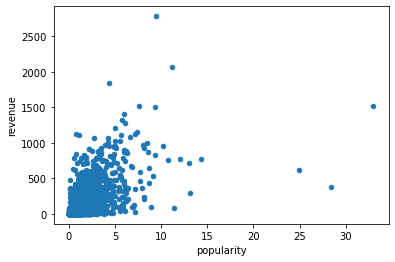

In [1363]:
# Plot a scatter to show corelation between popularity and revenue
df_movies.plot(x="popularity", y="revenue", kind="scatter")

In [1364]:
median = df_movies['revenue'].median()
low_revenue = df_movies.query('revenue < {}'.format(median))
high_revenue = df_movies.query('revenue >= {}'.format(median))


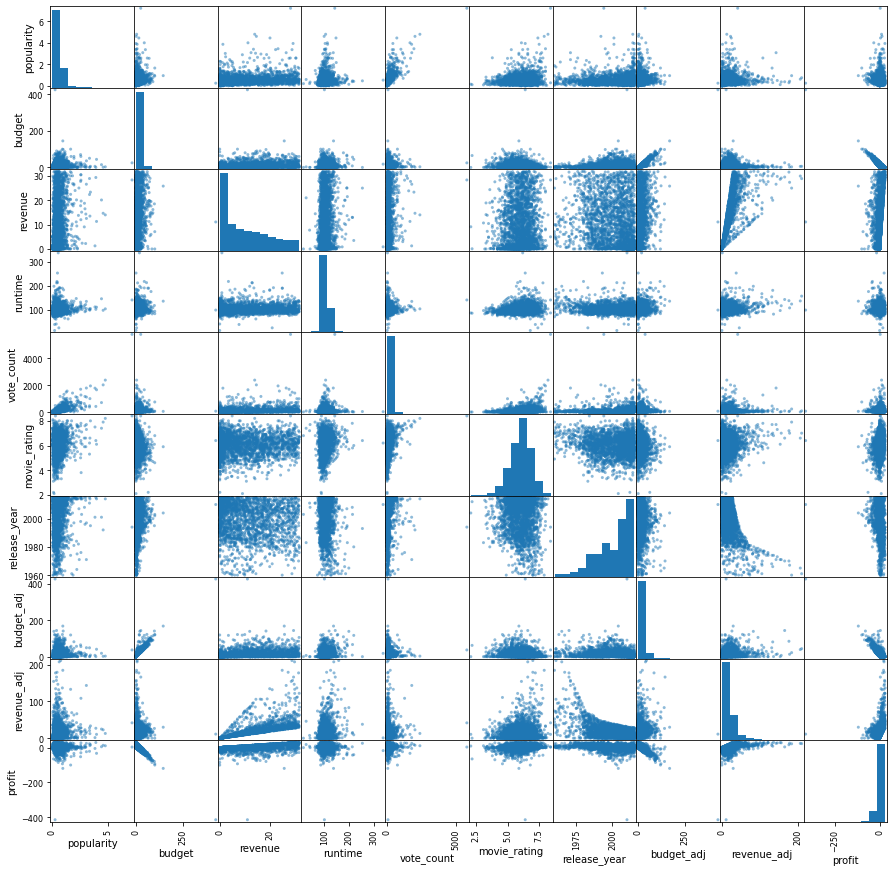

In [1365]:
pd.plotting.scatter_matrix(low_revenue, figsize = (15,15));

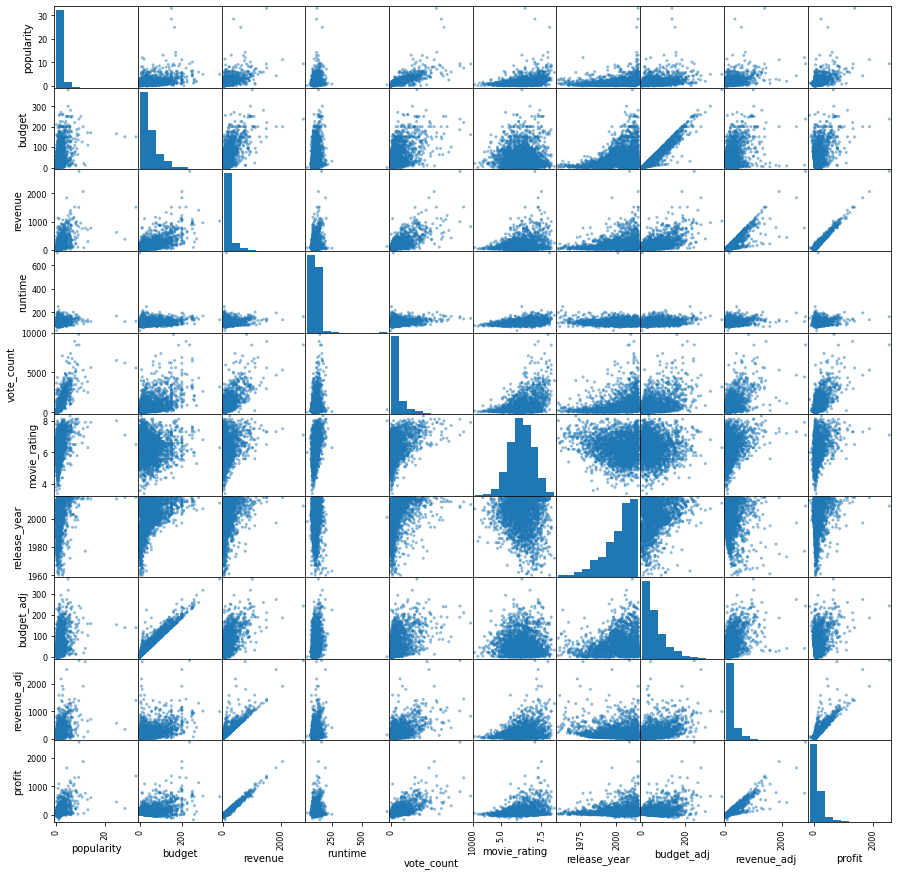

In [1366]:
pd.plotting.scatter_matrix(high_revenue, figsize = (15,15));

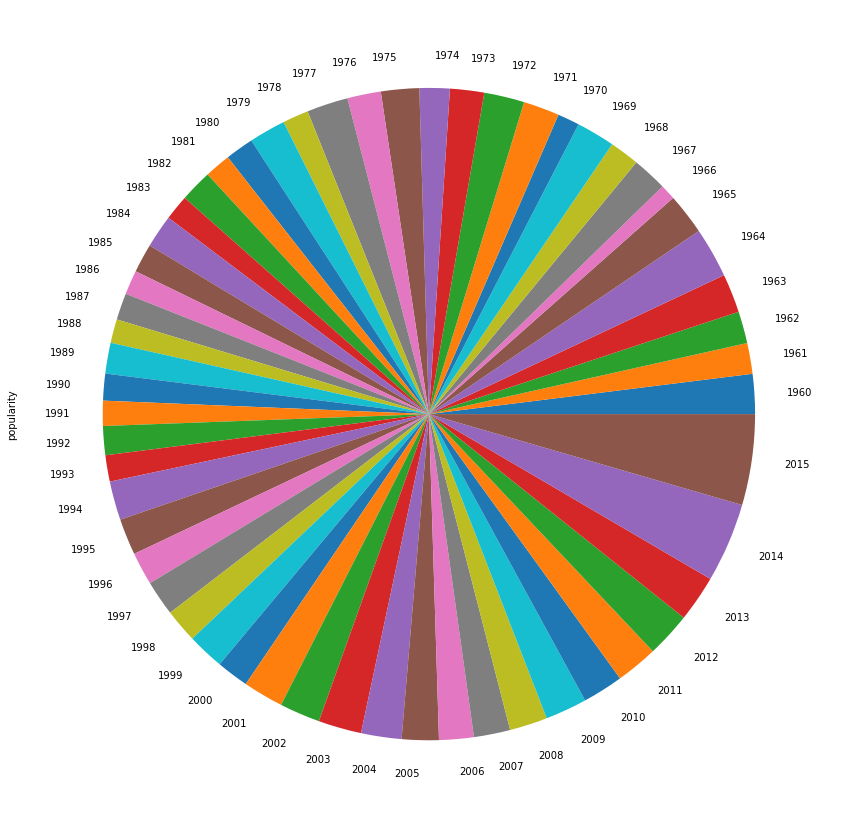

In [1367]:
#check which years were more popular movies released
df_movies.groupby("release_year").popularity.mean().plot(kind='pie', figsize=(15,15));

In [1368]:
# Group the data into two categories(low popularity and high popularity movies)
median = df_movies['popularity'].median()
low_popularity = df_movies.query('popularity < {}'.format(median))
high_popularity = df_movies.query('popularity >= {}'.format(median))

mean_revenue_low = low_popularity['revenue'].mean()
mean_revenue_high = high_popularity['revenue'].mean()


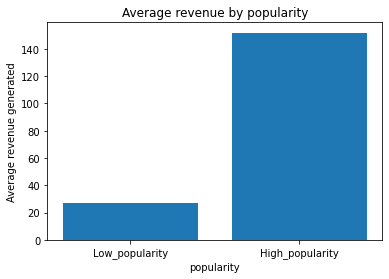

In [1369]:
# plot graph
locations = [1, 2]
heights = [mean_revenue_low, mean_revenue_high]
labels = ['Low_popularity', 'High_popularity']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average revenue by popularity')
plt.xlabel('popularity')
plt.ylabel('Average revenue generated');

In [1370]:
low_popularity['revenue'].mean(), high_popularity['revenue'].mean()

(26.844561938042084, 151.80926063377404)

Movies with **high popularity** generate **higher revenue**

### Do movies with high vote_count have high revenue

In [1371]:
# Group the data into two categories(low popularity and high popularity movies)
median = df_movies['vote_count'].median()
low_vote_count = df_movies.query('vote_count < {}'.format(median))
high_vote_count = df_movies.query('vote_count >= {}'.format(median))

vote_revenue_low = low_vote_count['revenue'].mean()
vote_revenue_high = high_vote_count['revenue'].mean()

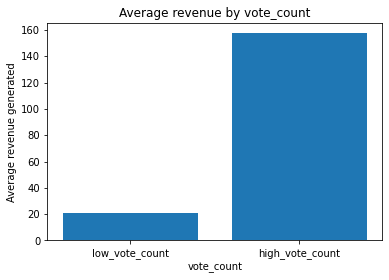

In [1372]:
# plot graph
locations = [1, 2]
heights = [vote_revenue_low, vote_revenue_high]
labels = ['low_vote_count', 'high_vote_count']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average revenue by vote_count')
plt.xlabel('vote_count')
plt.ylabel('Average revenue generated');

Movies with **high vote_count** have **higher revenue**

### Do movies with high budgets generate high profits?

In [1373]:
# Group the data into two categories(low budget and high budget movies)
median = df_movies['budget'].median()
low_budget = df_movies.query('budget < {}'.format(median))
high_budget = df_movies.query('budget >= {}'.format(median))

mean_profit_low = low_budget['profit'].mean()
mean_profit_high = high_budget['profit'].mean()

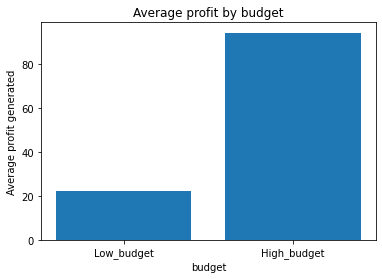

In [1374]:
#plot a barchart
locations = [1, 2]
heights = [mean_profit_low, mean_profit_high]
labels = ['Low_budget', 'High_budget']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average profit by budget')
plt.xlabel('budget')
plt.ylabel('Average profit generated');

Movies with **high budget** generate **higher profit**

In [1375]:
low_budget['profit'].mean(), high_budget['profit'].mean()

(22.217787697885168, 94.1501336290578)

### What is the average budget for a particular genre and which costs more?

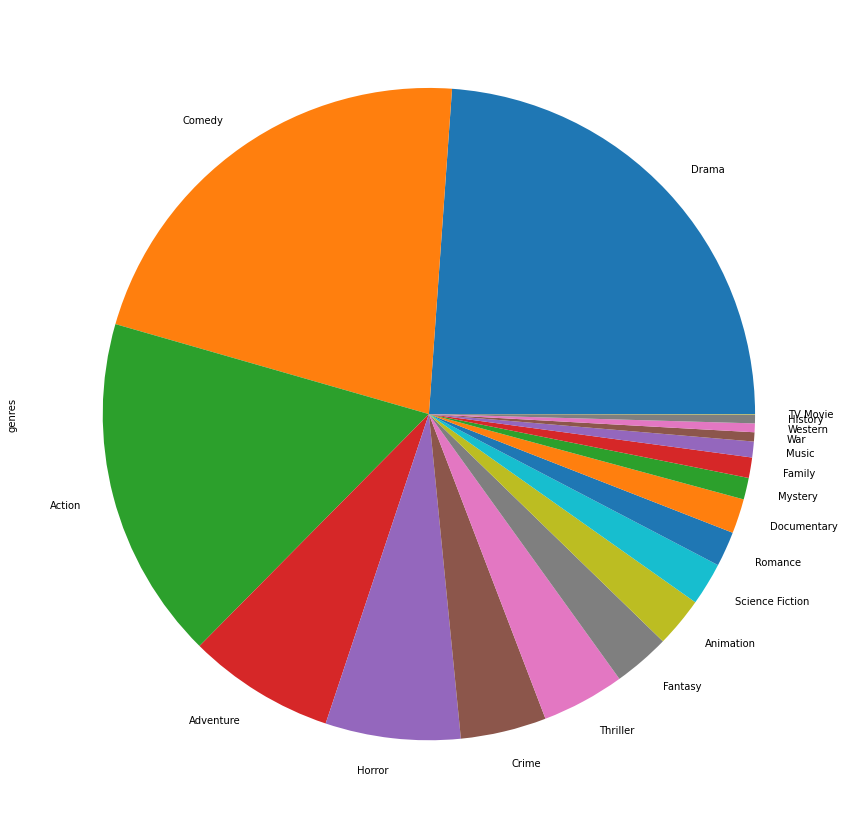

In [1376]:
# Most produced genres
df_movies['genres'].value_counts().plot(kind='pie', figsize=(15,15));

In [1377]:
#average budget to produce a genre
genres_budget = df_movies.groupby("genres").budget.mean().sort_values(ascending=False)
genres_budget

genres
Animation         68.7
Adventure         64.3
War               52.0
Science Fiction   50.2
Family            49.3
Fantasy           44.8
Action            43.2
Western           35.1
History           28.6
Thriller          27.0
Music             24.6
Romance           22.0
Crime             21.5
Mystery           21.1
Comedy            19.7
Drama             19.0
Horror            12.9
TV Movie           5.0
Documentary        1.6
Name: budget, dtype: float64

In [1378]:
#Use query() to group data base on these movie directors
Animation_budget = df_movies.query("genres=='Animation'").budget.mean()
Adventured_budget = df_movies.query("genres=='Adventure'").budget.mean()
War_budget = df_movies.query("genres=='War'").budget.mean()
Science_budget = df_movies.query("genres=='Science Fiction'").budget.mean()
Family_budget = df_movies.query("genres=='Family'").budget.mean()


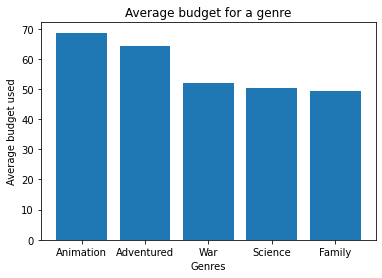

In [1379]:
#Plot a bar graph
locations = [1, 2, 3, 4, 5]
heights = [Animation_budget, Adventured_budget, War_budget, Science_budget, Family_budget]
labels = ['Animation', 'Adventured', 'War', 'Science', 'Family']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average budget for a genre')
plt.xlabel('Genres')
plt.ylabel('Average budget used');

In [1380]:
df_movies.query("genres=='Animation'").budget.mean(), df_movies.query("genres=='Adventure'").budget.mean(), df_movies.query("genres=='War'").budget.mean(), df_movies.query("genres=='Science Fiction'").budget.mean(), df_movies.query("genres=='Family'").budget.mean()

(68.67666666666668,
 64.3309354107649,
 52.0090909090909,
 50.234048669902904,
 49.285714285714285)

The average budget for **Animation, Adventure, War, Science** and **Family** are **68.68 million, 64.33 million, 52.00 million, 50.23 million** and **49.29 million** respectively

### Do movies with high runtime have high budget?

In [1381]:
#Base on the meadian use query() to group data into short runtime and high runtime
median = df_movies['runtime'].median()
short_runtime = df_movies.query('runtime < {}'.format(median))
long_runtime = df_movies.query('runtime >= {}'.format(median))

mean_budget_low = short_runtime['budget'].mean()
mean_budget_high = long_runtime['budget'].mean()

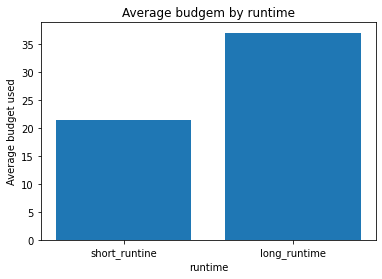

In [1382]:
locations = [1, 2]
heights = [mean_budget_low, mean_budget_high]
labels = ['short_runtine', 'long_runtime']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average budgem by runtime')
plt.xlabel('runtime')
plt.ylabel('Average budget used');

In [1383]:
short_runtime['budget'].mean(),long_runtime['budget'].mean()

(21.439531029883053, 37.04300904340963)

Movies with **high runtime** are associeted withh **high budget**

### The top 5 movies based on profit

In [1384]:
# top 10 movies that grossed the highest proit and the directors for those movies

top_5_profit = df_movies[["original_title", "director", "profit", "genres", "release_year", "movie_rating"]].head(5)
top_5_profit

,original_title,director,profit,genres,release_year,movie_rating
1386,Avatar,James Cameron,2544.5,Action,2009,7.1
3,Star Wars: The Force Awakens,J.J. Abrams,1868.2,Action,2015,7.5
5231,Titanic,James Cameron,1645.0,Drama,1997,7.3
0,Jurassic World,Colin Trevorrow,1363.5,Action,2015,6.5
4,Furious 7,James Wan,1316.2,Action,2015,7.3


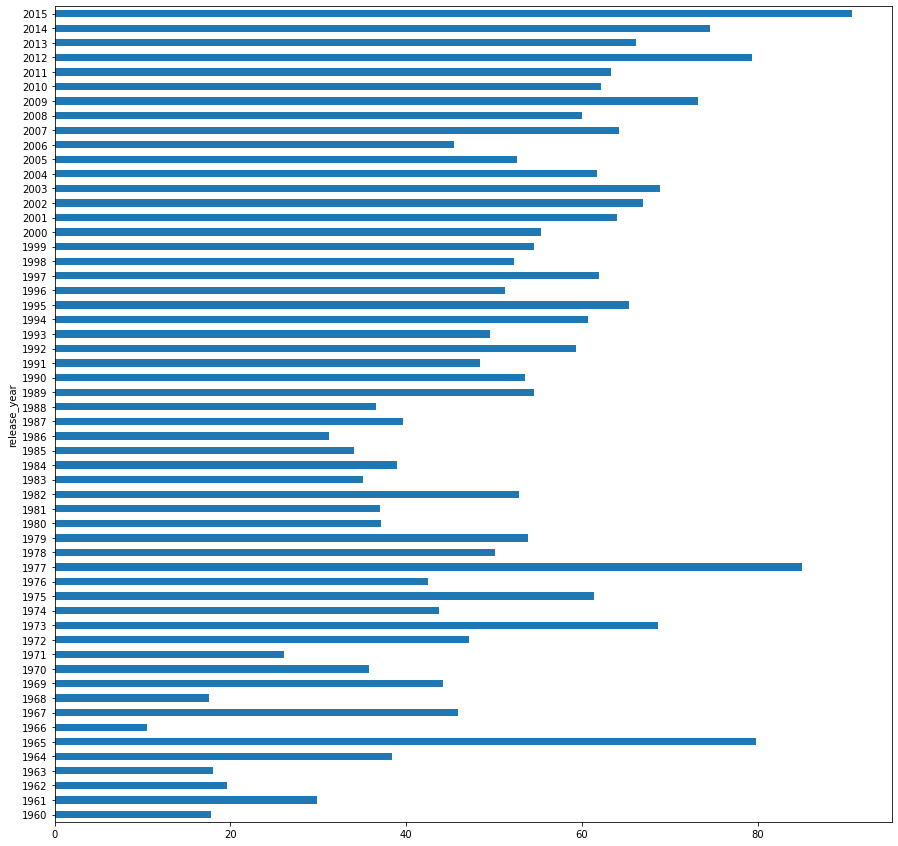

In [1385]:
df_movies.groupby("release_year").profit.mean().plot(kind='barh', figsize=(15,15));

<AxesSubplot:ylabel='original_title'>

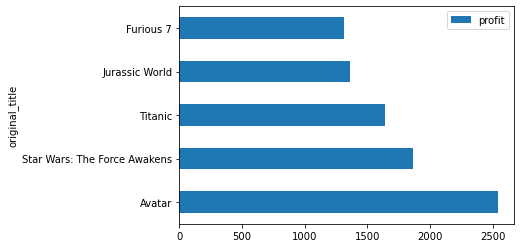

In [1386]:
top_5_profit.plot(x="original_title", y="profit", kind="barh")

**Avatar** directored by **James Cameron** made **2544.5** million in profits

### Which movies had the best movie_rating and who were the movies directors?

In [1387]:
df_movies.sort_values(by="movie_rating", ascending=False, inplace=True)
df_movies = df_movies.reset_index()
top_5_rating = df_movies[["original_title", "director", "movie_rating"]].head()
top_5_rating

,original_title,director,movie_rating
0,The Shawshank Redemption,Frank Darabont,8.4
1,Stop Making Sense,Jonathan Demme,8.4
2,The Godfather,Francis Ford Coppola,8.3
3,Whiplash,Damien Chazelle,8.2
4,Bill Cunningham New York,Richard Press,8.1


**The Shawshank Redemption** directed by **Frank Darabon** was rated **8.4**

### Which genre has the highest movie_rating?

In [1388]:
high_rating = df_movies.groupby(['genres']).movie_rating.mean().sort_values(ascending=False)
high_rating.head()

genres
Documentary   6.9
War           6.5
Crime         6.4
Drama         6.4
History       6.4
Name: movie_rating, dtype: float64

<AxesSubplot:ylabel='genres'>

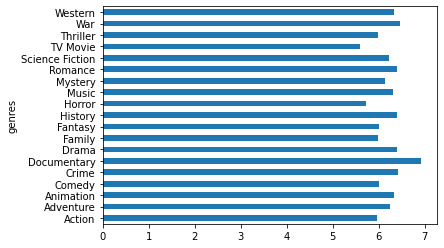

In [1389]:
df_movies.groupby(['genres']).movie_rating.mean().plot(kind="barh")

**Documetary** movies are mostly rated high

### Through the peroid which directors produced most and what is the average movie_rating

In [1390]:
# directors with most movies
df_movies.groupby("director").director.count().sort_values(ascending=False).head()

director
Steven Spielberg    27
Clint Eastwood      26
Ridley Scott        22
Woody Allen         22
Ron Howard          18
Name: director, dtype: int64

In [1391]:
#Find the average movie_rating of all movies each 
common_directors = df_movies.query('director==["Steven Spielberg","Clint Eastwood", "Woody Allen", "Ridley Scott", "Ron Howard"]')
common_directors.groupby("director").movie_rating.mean().sort_values(ascending=False)

director
Steven Spielberg   6.8
Woody Allen        6.7
Clint Eastwood     6.6
Ridley Scott       6.5
Ron Howard         6.5
Name: movie_rating, dtype: float64

In [1392]:
Steven_Spielberg = df_movies.query("director=='Steven Spielberg'").movie_rating.mean()
Clint_Eastwood = df_movies.query("director=='Clint Eastwood'").movie_rating.mean()
Woody_Allen = df_movies.query("director=='Woody Allen'").movie_rating.mean()
Ridley_Scott = df_movies.query("director=='Ridley Scott'").movie_rating.mean()
Ron_Howard = df_movies.query("director=='Ron Howard'").movie_rating.mean()
                                   


<AxesSubplot:ylabel='genres'>

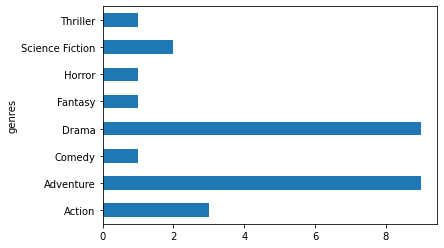

In [1393]:
#Groupp and plot a bar graph
Steven = df_movies.query("director=='Steven Spielberg'")
Steven.groupby("genres").genres.count().plot(kind="barh")

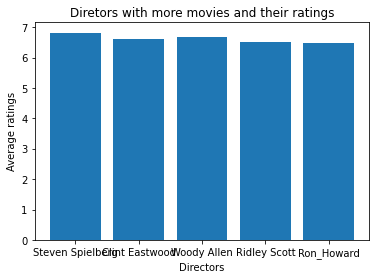

In [1394]:
locations = [1, 2, 3, 4, 5]
heights = [Steven_Spielberg, Clint_Eastwood, Woody_Allen, Ridley_Scott, Ron_Howard]
labels = ['Steven Spielberg', 'Clint Eastwood', 'Woody Allen', 'Ridley Scott', 'Ron_Howard']
plt.bar(locations, heights, tick_label=labels)
plt.title('Diretors with more movies and their ratings')
plt.xlabel('Directors')
plt.ylabel('Average ratings');

Directors **Steven Spielberg(27), Clint Eastwood(26), Woody Allen(22), Ridley Scott(22), Ron Howard(18)** directed most and have an average ratings of **6.8, 6.7, 6.6, 6.5, 6.5**

<a id='conclusions'></a>
### Conclusions

>1.a. The is a slight positive correlation between **popularity** and **revenue**.

>  b. When the data was divided into a low_revenue and high_revenue the corelation between **popularity** and **revenue**  
>improved slightly.

>c. In the low revenue data the corelation between **revenue** and **vote_count** was positive whereas in the low revenue   >    data is was normal. 

>  d. **2015** had the highest popularity mean, followed by **2014**.

>  e. Movies with **high popularity** associted with **higher revenue**.
>
>2.a.Movies with **high vote_count** have **higher revenue**

>3.a. Movies with **high budget** generate **higher profit**. They had a mean profit of **94.1501336290578** compared to    **22.217787697885168** of **low budget** movies.
>
>4.a. **Avatar** generated the most profits, follow by **Titanic**
Avatar directored by James Cameron made 2544.5 million in profits

>  b. Out of the top five movies 4 were **Action**

>  c. Out of the top five movies 3 were released in **2015**.

>  d. **2015** had the highest profit mean **2012** 
>
>5.a**The Shawshank Redemption** directed by **Frank Darabon** was rated highest with **8.4**
>
>6.a.The most genres produced **Drama, Comedy** and **Action** in the descending order.

> .b.**Animation** had the highest budget mean **68.68 million** followed by **Adventure** with **64.33 million**

>  Both genres are in the category of least produced genres.

>7.a.Movies with high runtime are associated with hight budget.

>9.a.**Documentary** movies are normally rated high.

>10.a.**Steven Spielberg,Clint Eastwood, Woody Allen, Ridley Scott** and **Ron Howard** directed more movies within the period.
They directed **27, 26, 22, 22** and **16** movies respectively with an average rating of **6.8, 6.7, 6.6, 6.5** and  **6.5**